<a href="https://colab.research.google.com/github/DongExxn/2023S-Ajou-ML/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 :: Exploratory Data Analysis (EDA)

## 과제 목표
-	데이터의 형식에 대해서 이해하고 이를 변환할 수 있다. 
  -	특히, numpy 와 pandas 라이브러리에 기반한 데이터 처리를 할 수 있다. 
-	결측값, 중복값, 이상치를 처리하고 다양한 시각화를 할 수 있다.
-	기본적인 Exploratory Data Analysis를 수행할 수 있다. 
-	데이터는 동봉된 train.csv을 이용한다. 


## 코랩과 구글 드라이브 연동하기

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# pwd 명령어로 현재 위치 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [37]:
!ls # 현재 위치에 있는 디렉토리와 파일 목록 확인

 data2.csv   'HW0.ipynb의 사본'      'HW1.ipynb의 사본'   train.csv
 data3.xlsx  'HW0.ipynb의 사본 (1)'   iris.csv


In [38]:
cd ./drive/MyDrive/Colab Notebooks

[Errno 2] No such file or directory: './drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


## 데이터 불러오기 & 살펴보기

※본 과제는 [Loan Default prediction dataset] 데이터에 기반하여 출제 되었습니다.

(https://www.kaggle.com/datasets/hemanthsai7/loandefault)



이 데이터는 자금 지원액, 잔액, 대출금 등 다양한 개인의 속성을 살펴, 대출 연체자가 될 지 예측하는 문제에 활용될 수 있습니다.  
원래의 자료에서는 Train과 Test Dataset으로 나뉘어, 총 35개의 column과 96,000여개의 observation으로 구성되어 있습니다.   
이번 과제에서는 Train data만을 사용하여 EDA를 해봅시다. 

※ 데이터에 대한 자세한 설명은 HW1 word 파일을 확인해주세요

In [39]:
# 이번 과제는 numpy, pandas와 같은 데이터를 불러내고 확인, 처리, 
# 수정 등을 쉽게 할 수 있는 library를 사용합니다.
# 그래프를 그릴 때에는 matplotlib, seaborn library를 사용합니다.

# 모듈 이름 뒤에 as를 쓰고 별칭을 적으면 해당 별칭으로 모듈을 호출할 수 있습니다.
# 모듈명: numpy, 별칭: np => numpy를 쓰는 대신 np를 써서 numpy 호출
# 모듈명: pandas, 별칭: pd => pandas를 쓰는 대신 pd를 써서 pandas 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# './'는 이 노트북 파일의 현재 위치를 뜻 합니다.
path = 'train.csv'

# pandas의 read_csv 함수를 사용하여 csv파일을 DataFrame으로 불러옵니다.
data = pd.read_csv(path)

In [41]:
# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와 
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (67463, 35) => 67463 개의 row(행), 35 개의 column(열)을 가진 데이터

(67463, 35)

In [42]:
# head() 함수를 이용하여 해당 데이터의 맨 위 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [43]:
# tail() 함수를 이용하여 해당 데이터의 맨 뒤 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,...,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [44]:
# DataFrame을 이루고 있는 column 별 데이터의 타입을 확인합니다.

data.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [45]:
# describe()는 각 column에 대해 통계량을 요약해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.

data.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


## 결측값과 중복값 확인하기
결측값과 중복값은 데이터 분석 결과에 큰 영향을 줍니다.   
제공된 데이터에 결측값과 중복값이 있는지 알아봅시다.

In [46]:
# isnull()는 DataFrame에 있는 결측치(NA)를 boolean 값으로 반환하는 함수입니다.
# 결측치가 있으면 True를 반환합니다.

data.isnull().head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# isnull()에 sum() 를 결합하여 DataFrame에 있는 결측치의 합을 구합니다.

data.isnull().sum() 
# 현재 데이터에서는 결측치가 없습니다. 
# 데이터에 결측치가 있는 경우, 결측값을 갖는 데이터를 삭제하거나 결측값을 보정하여 채우는 방법으로 결측치를 처리하여야 합니다.

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [48]:
# duplicated()는 중복된 데이터를 Series 형식으로 반환합니다.

data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
67458    False
67459    False
67460    False
67461    False
67462    False
Length: 67463, dtype: bool

In [49]:
# duplicated()에 sum()을 결합하여 DataFrame에 있는 중복 데이터의 합을 구합니다.

data.duplicated().sum()

0

## 문제 1 :: 데이터 정리

### 문제 1-1
DataFrame data의 각 feature에 포함된 unique value의 개수를 구하고 그 개수를 출력하여 보고서에 캡처하여 첨부하세요 (힌트: pandas에 있는 함수 사용) 

In [50]:
### 문제 1-1 ###
# 코드 작성
data.nunique()
################

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

### 문제 1-2
문제 1-1 결과를 바탕으로 unique value가 1인 column을 삭제하고 data.columns를 실행하여 그 결과를 보고서에 캡처하여 첨부하세요

In [51]:
### 문제 1-2 ###
data = data.drop(['Accounts Delinquent', 'Payment Plan'], axis = 1)
################
print(data.columns)

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')


### 문제 1-3
DataFrame data의 feature 이름에는 feature의 이름을 이루는 단어가 두 단어 이상인 경우, 공백이 포함되어 있습니다. feature 이름에 공백을 없애는 코드를 작성하고 data.columns를 실행하여 그 결과를 보고서에 첨부하세요.

In [52]:
### 문제 1-3 ###
data.columns = data.columns.str.replace(' ', '')
################
print(data.columns)

Index(['ID', 'LoanAmount', 'FundedAmount', 'FundedAmountInvestor', 'Term',
       'BatchEnrolled', 'InterestRate', 'Grade', 'SubGrade',
       'EmploymentDuration', 'HomeOwnership', 'VerificationStatus',
       'LoanTitle', 'DebittoIncome', 'Delinquency-twoyears',
       'Inquires-sixmonths', 'OpenAccount', 'PublicRecord', 'RevolvingBalance',
       'RevolvingUtilities', 'TotalAccounts', 'InitialListStatus',
       'TotalReceivedInterest', 'TotalReceivedLateFee', 'Recoveries',
       'CollectionRecoveryFee', 'Collection12monthsMedical', 'ApplicationType',
       'LastweekPay', 'TotalCollectionAmount', 'TotalCurrentBalance',
       'TotalRevolvingCreditLimit', 'LoanStatus'],
      dtype='object')


## 문제 2 :: 범주형, 수치형 데이터


### 문제 2-1
위 ```데이터 살펴보기``` 섹션에서 ```data.dtypes```로 데이터의 type을 살펴보았습니다. ```data.dtypes``` 결과를 참고하여 범주형 데이터(categorical data)를 가진 열의 이름을 담고 있는 List ```categorical```를 아래의 조건을 지켜서 만드세요.
* 이 문제에서는 범주형 데이터가 ```object``` type을 가지고 있다고 가정합니다.
(실제 데이터에서는 dtypes 결과가 int이더라도 categorical일 수 있습니다)
* categorical 변수의 data type은 Index가 아니라 List입니다.
<br>
보고서에 코드와 categorical 변수의 출력값을 함께 캡처하여 제출합니다.

In [53]:
### 문제 2-1 ###
# 보고서에 코드와 categorical 함수의 출력값을 함께 캡처하여 제출합니다

categorical = [] # object 타입인 열(column)의 이름을 담을 리스트

for column in data.columns:
    if data[column].dtype == 'object':
        categorical.append(column)
###############
print(categorical)

['BatchEnrolled', 'Grade', 'SubGrade', 'EmploymentDuration', 'VerificationStatus', 'LoanTitle', 'InitialListStatus', 'ApplicationType']


### 문제 2-2
List categorical에 속하지 않은 feature들을 List numerical에 저장하고 numerical를 출력하여 보고서에 첨부하세요. (힌트: set(집합)

In [54]:
### 문제 2-2 ###
numerical = list(set(data.columns) - set(categorical))
###############
print(numerical)

['InterestRate', 'LoanStatus', 'HomeOwnership', 'TotalAccounts', 'Inquires-sixmonths', 'CollectionRecoveryFee', 'Term', 'TotalReceivedInterest', 'Recoveries', 'TotalCurrentBalance', 'Delinquency-twoyears', 'DebittoIncome', 'Collection12monthsMedical', 'FundedAmountInvestor', 'PublicRecord', 'TotalRevolvingCreditLimit', 'RevolvingBalance', 'FundedAmount', 'OpenAccount', 'TotalReceivedLateFee', 'ID', 'TotalCollectionAmount', 'RevolvingUtilities', 'LastweekPay', 'LoanAmount']


## 문제 3 :: 데이터 시각화


### 문제 3-1
```seaborn.countplot```을 사용하여 각 Loan Status 에 대한 Grade, Term, Employment Duration의 countplot을 출력하여 3개의 countplot을 보고서에 캡처하여 첨부하세요.


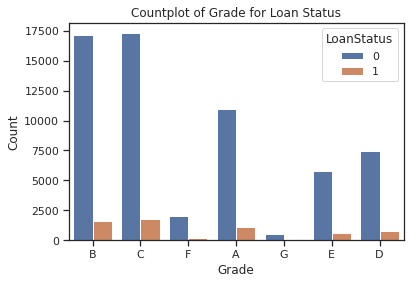

In [55]:
# Loan Status에 대한 Grade의 countplot 작성
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True) #스타일은 ticks로, 색상코드를 true로 설정

# Create the countplot
sns.countplot(x="Grade", hue="LoanStatus", data=data) #countplot 만들기

# Add labels and title
plt.xlabel("Grade") #x,y축 레이블 추가
plt.ylabel("Count")
plt.title("Countplot of Grade for Loan Status")

# Show the plot
plt.show()

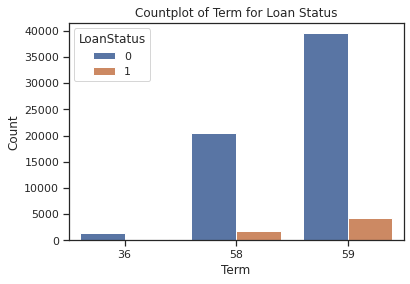

In [56]:
# Loan Status에 대한 Term의 countplot 작성
# Create the countplot
sns.countplot(x="Term", hue="LoanStatus", data=data) #countplot 만들기

# Add labels and title
plt.xlabel("Term") #x,y축 레이블 추가
plt.ylabel("Count")
plt.title("Countplot of Term for Loan Status")

# Show the plot
plt.show()

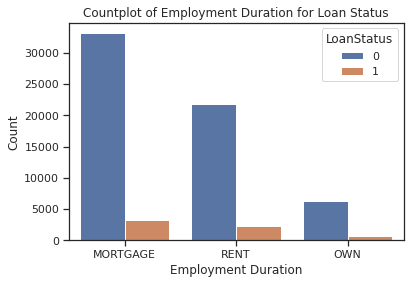

In [57]:
# Loan Status에 대한 Employment Duration의 countplot 작성
# Create the countplot
sns.countplot(x="EmploymentDuration", hue="LoanStatus", data=data) #countplot 만들기

# Add labels and title
plt.xlabel("Employment Duration") #x,y축 레이블 추가
plt.ylabel("Count")
plt.title("Countplot of Employment Duration for Loan Status")

# Show the plot
plt.show()

### 문제 3-2
'Interest Rate'에 대한 boxplot을 그리고 캡처하여 보고서에 첨부하세요. 그리고 boxplot에 대해서 아래의 조건을 지켜 서술하세요. (강의노트 2, 40쪽 참고)
* 서술에는 최소, 최대, 중앙값, Q1, Q3, outlier(이상치)를 포함합니다.

Minimum:  5.320005799
Maximum:  27.18234758
Median:  11.37769635
Q1:  9.2971471585
Q3:  14.193533065
Outliers:  79       22.019769
228      23.107420
238      24.670390
254      21.864763
277      22.619669
           ...    
66711    22.052032
66714    24.688754
66736    26.545888
67156    21.755005
67169    25.814732
Name: InterestRate, Length: 851, dtype: float64


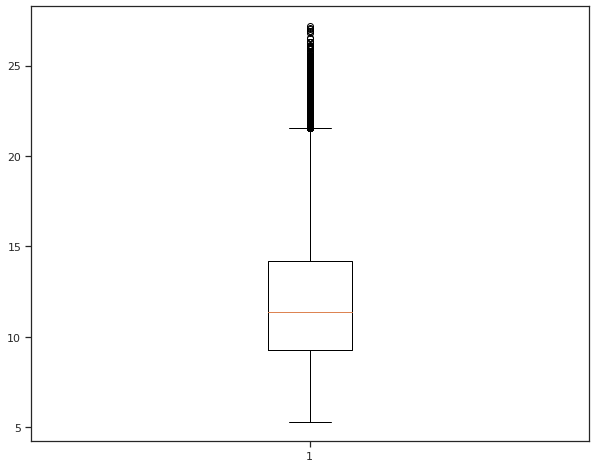

In [58]:
plt.figure(figsize=(10,8))
#boxplot = data.boxplot(column=['InterestRate'])
#plt.show()
plt.boxplot(data["InterestRate"])

# Find the minimum, maximum, median, Q1, and Q3 values
minimum = np.min(data["InterestRate"])
maximum = np.max(data["InterestRate"])
median = np.median(data["InterestRate"])
q1 = np.percentile(data["InterestRate"], 25)
q3 = np.percentile(data["InterestRate"], 75)

# Find the outliers
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data["InterestRate"] < lower_bound) | (data["InterestRate"] > upper_bound)]["InterestRate"]

# Print the results
print("Minimum: ", minimum)
print("Maximum: ", maximum)
print("Median: ", median)
print("Q1: ", q1)
print("Q3: ", q3)
print("Outliers: ", outliers)


### 문제 3-3
문제 3-2에서 그린 boxplot에는 outlier가 있습니다. 'InterestRate'에 있는 outlier를 제거하는 함수 extract_outliers() 의 빈 칸을 채워 outlier를 찾으세요. extract_outliers 함수를 캡처하여 보고서에 첨부하세요.
* 입력: 원본 데이터, outlier가 있는 열의 이름
* 출력: outlier들만 있는 DataFrame

In [59]:
def extract_outliers(data,col):

  q1 =  data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)

  ################  문제 3-3  ####################
  # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
  # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
  ################ 코드 시작  #####################
  IQR=q3-q1 #IQR = Q3 -Q1
  IQR_weight = IQR*1.5 #weight 구하기
  
  lowest=q1-IQR_weight #최소값
  highest=q3+IQR_weight #최대값

  out=data[(data[col]<lowest)|(data[col]>highest)] #이상치
  print(out)
  ################ 코드 끝 ######################
  return out 

In [60]:
outlier = extract_outliers(data, "InterestRate")

             ID  LoanAmount  FundedAmount  FundedAmountInvestor  Term  \
79      5777207       18874         16334           9289.247238    59   
228    22688037       16630          6766          21229.668480    59   
238     6388556       13709          8031          25148.396570    59   
254     1794250       20187          7143          12124.428250    59   
277    43659319       16491         13269          14081.997680    59   
...         ...         ...           ...                   ...   ...   
66711  16321709       12637         21685          19853.808170    59   
66714   6232346       18373         31456          14939.169930    59   
66736   5496058       12981         10425          11225.407360    59   
67156  56902967        6717         32637           9040.558684    59   
67169   3028289        8980          7791           6426.263640    59   

      BatchEnrolled  InterestRate Grade SubGrade EmploymentDuration  ...  \
79       BAT3865626     22.019769     C       F

In [61]:
data = data.drop(outlier.index, errors='ignore', axis=0)

## 문제 4
문제1에서 구한 List categorical에는 'Grade' 와 'Sub Grade' feature가 포함되어있습니다. 이 두 가지 feature에 대해 살펴봅시다.

In [62]:
data['Grade'].unique() # 'Grade'에 포함된 값 확인

array(['B', 'C', 'F', 'A', 'G', 'E', 'D'], dtype=object)

In [63]:
data['SubGrade'].unique() # 'SubGrade'에 포함된 값 확인

array(['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1', 'B4',
       'A4', 'B2', 'D2', 'C1', 'F3', 'D1', 'F2', 'A2', 'A3', 'F1', 'E5',
       'B3', 'F4', 'G1', 'F5', 'E1', 'E2', 'D5', 'G2', 'E4', 'A1', 'G3',
       'E3', 'G4'], dtype=object)

'Grade'와 'SubGrade'를 사용하여 두 categorical feature를 하나의 numerical feature로 통합한 'FinalGrade' 열을 생성합니다. 'FinalGrade' 열은 다음과 같은 규칙으로 생성됩니다. <br>
* 'Grade'는 A부터 G까지 7까지의 등급을 가지고 있습니다. 'Grade'가 A로 시작하면 700, B로 시작하면 600, ..., G로 시작하면 100을 부여합니다.
* 'SubGrade'는 A부터 G까지 7까지의 등급을 가지고 있습니다. 'SubGrade'가 A로 시작하면 70, B로 시작하면 60, ..., G로 시작하면 10을 부여합니다. 'SubGrade'의 두 번째 자리(숫자 부분)를 앞에서 구한 정수값과 더한 값이 최종 'SubGrade'의 값입니다.
* 'FinalGrade'는 각 'Grade'와 'SubGrade' 값을 더한 값입니다.
* 예시) Grade: A, SubGrade: A4
      A => 700, A4 => 70 + 4
      Final Grade = 770

### 문제 4-1
주어진 list num과 label, di를 사용하여 'SubGrade' 값을 정수로 바꾸는 ```def subGradeEncoder```를 구현하고 코드와 셀 실행 결과를 모두 캡처하여 보고서에 첨부하세요.

In [64]:
num = [10, 20, 30, 40, 50, 60, 70]
label = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
di = dict(zip(label, num))

def subGradeEncoder(data, di):
  result = []
  ################ 문제 4-1 ##################
  # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
  # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
  ################ 코드 시작  ################
  data['Sub Grade Value'] = data['SubGrade'].str[0].map(di)

  data['Sub Grade Digit'] = data['SubGrade'].str[1].astype(int)

  result = data['Sub Grade Value'] + data['Sub Grade Digit']
  ################ 코드 끝  ##################
  return result

data['SubGrade'] = subGradeEncoder(data, di)
print(data['SubGrade'])

0        54
1        43
2        44
3        53
4        44
         ..
67458    74
67459    63
67460    23
67461    33
67462    41
Name: SubGrade, Length: 66612, dtype: int64


### 문제 4-2
주어진 list num과 label, di를 사용하여 'Grade' 값을 정수로 바꾸는 ```def gradeEncoder```를 구현하고 코드와 셀 실행 결과를 모두 캡처하여 보고서에 첨부하세요.

In [65]:
num = [100, 200, 300, 400, 500, 600, 700]
label = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
di = dict(zip(label, num))

def gradeEncoder(data, di):
  result = []
  ################ 문제 4-2 ##################
  # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
  # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
  ################ 코드 시작  ################
  
  result = data['Grade Value'] = data['Grade'].str[0].map(di)
  ################ 코드 끝  ##################
  return result

data['Grade'] = gradeEncoder(data, di)
print(data['Grade'])

0        600
1        500
2        200
3        500
4        500
        ... 
67458    500
67459    500
67460    700
67461    400
67462    600
Name: Grade, Length: 66612, dtype: int64


### 문제 4-3
'Sub Grade' 열의 값과 'Grade' 값을 합하여 최종적인 'Grade' 값을 담은 ```Final Grade```라는 열을 생성하고 코드와 셀 실행 결과를 모두 캡처하여 보고서에 첨부하세요.

In [66]:
### 문제 4-3 ###
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
### 코드 시작 ##

data['Final Grade'] = data['Grade Value'] + data['SubGrade']

################
print(data['Final Grade'])

0        654
1        543
2        244
3        553
4        544
        ... 
67458    574
67459    563
67460    723
67461    433
67462    641
Name: Final Grade, Length: 66612, dtype: int64


In [67]:
data = data.drop(labels = ['Grade', 'SubGrade'], axis=1)

## 문제 5
문제 5 는 보고서에 출제되어있습니다. 보고서에 답안을 작성해주세요.